# **Introducing**




In the present era, an increasing number of people are opting for online transportation services because they offer a means to alleviate stress, allowing users to make use of their travel time for other activities. This trend has led to the establishment of Uber and Lyft, two prominent platforms that provide transportation services through mobile applications. The pricing structures on both platforms are dynamic, requiring analysis to identify and predict the factors influencing these fluctuations, achieved through linear regression.

To facilitate this investigation, a dataset sourced from Kaggle is utilized, containing information extracted from the Uber and Lyft applications. This dataset consists of 693,071 rows and 57 columns. The model developed for this project will be implemented using Streamlit.

The dataset used is a good dataset for modeling linear regression to observe patterns in features that most influence the pricing of Uber and Lyft. We formulated a problem regarding the most significant factors influencing the prices of Uber and Lyft. In this case, we employed correlation analysis, where low correlations will be eliminated to achieve more accurate predictions.

# **Import Libraries**

The libraries needed to model a linear regression include numpy, pandas, sympy, seaborn, matplotlib, dython nominal, joblib, and sklearn.

In [ ]:
pip install dython

In [ ]:
import numpy as np
import pandas as pd
import sympy as sp
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from dython.nominal import associations
from joblib import dump

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

# **Data Loading**

The required dataset will be read by the program.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/FinalProject/rideshare_kaggle.csv")

Summary information about the DataFrame

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

Summary of descriptive statistics from DataFrame

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
timestamp,693071.0,1.544046e+09,689192.492586,1.543204e+09,1.543444e+09,1.543737e+09,1.544828e+09,1.545161e+09
hour,693071.0,1.161914e+01,6.948114,0.000000e+00,6.000000e+00,1.200000e+01,1.800000e+01,2.300000e+01
day,693071.0,1.779436e+01,9.982286,1.000000e+00,1.300000e+01,1.700000e+01,2.800000e+01,3.000000e+01
month,693071.0,1.158668e+01,0.492429,1.100000e+01,1.100000e+01,1.200000e+01,1.200000e+01,1.200000e+01
price,637976.0,1.654513e+01,9.324359,2.500000e+00,9.000000e+00,1.350000e+01,2.250000e+01,9.750000e+01
distance,693071.0,2.189430e+00,1.138937,2.000000e-02,1.280000e+00,2.160000e+00,2.920000e+00,7.860000e+00
surge_multiplier,693071.0,1.013870e+00,0.091641,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00
latitude,693071.0,4.233817e+01,0.047840,4.221480e+01,4.235030e+01,4.235190e+01,4.236470e+01,4.236610e+01
longitude,693071.0,-7.106615e+01,0.020302,-7.110540e+01,-7.108100e+01,-7.106310e+01,-7.105420e+01,-7.103300e+01
temperature,693071.0,3.958439e+01,6.726084,1.891000e+01,3.645000e+01,4.049000e+01,4.358000e+01,5.722000e+01


Descriptive statistics specific to object columns

In [ ]:
df.describe(include='object').T

,count,unique,top,freq
id,693071,693071,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1
datetime,693071,31350,2018-11-26 23:21:14,156
timezone,693071,1,America/New_York,693071
source,693071,12,Financial District,58857
destination,693071,12,Financial District,58851
cab_type,693071,2,Uber,385663
product_id,693071,13,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,55096
name,693071,13,UberXL,55096
short_summary,693071,9,Overcast,218895
long_summary,693071,11,Mostly cloudy throughout the day.,202340


# **Data Cleaning**


Data cleaning aims to identify, handle, and clean problems in the dataset.

Count the number of null values ​​(NaN) in column 'price'.

In [ ]:
df['price'].isnull().sum()

55095

To fill missing (null or NaN) values in the "price" column of a DataFrame with the mean value of the "price" column.

In [ ]:
df["price"] = df["price"].fillna(df["price"].mean())

For further modeling, the feature related to date is not needed, so delete the feature.

In [ ]:
df = df.drop(['id','timestamp','datetime','long_summary','apparentTemperatureHighTime','apparentTemperatureLowTime',
                  'apparentTemperatureLowTime','windGustTime','sunriseTime','sunsetTime','uvIndexTime','temperatureMinTime',
                 'temperatureMaxTime','apparentTemperatureMinTime','temperatureLowTime','apparentTemperatureMaxTime'],axis=1)

'distance' feature can already represent the 'source' and 'destination' features, so remove 'source' and 'destination' features.

In [ ]:
df = df.drop(['source','destination'],axis=1)

'product_id' feature contains many unidentified values, so delete that feature.

In [ ]:
df['product_id'].unique()

array(['lyft_line', 'lyft_premier', 'lyft', 'lyft_luxsuv', 'lyft_plus',
       'lyft_lux', '6f72dfc5-27f1-42e8-84db-ccc7a75f6969',
       '6c84fd89-3f11-4782-9b50-97c468b19529',
       '55c66225-fbe7-4fd5-9072-eab1ece5e23e',
       '9a0e7b09-b92b-4c41-9779-2ad22b4d779d',
       '6d318bcc-22a3-4af6-bddd-b409bfce1546',
       '997acbb5-e102-41e1-b155-9df7de0a73f2',
       '8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a'], dtype=object)

In [ ]:
df = df.drop('product_id',axis=1)

Find the correlation between numerical and categorical variables with the help of *dython* library.

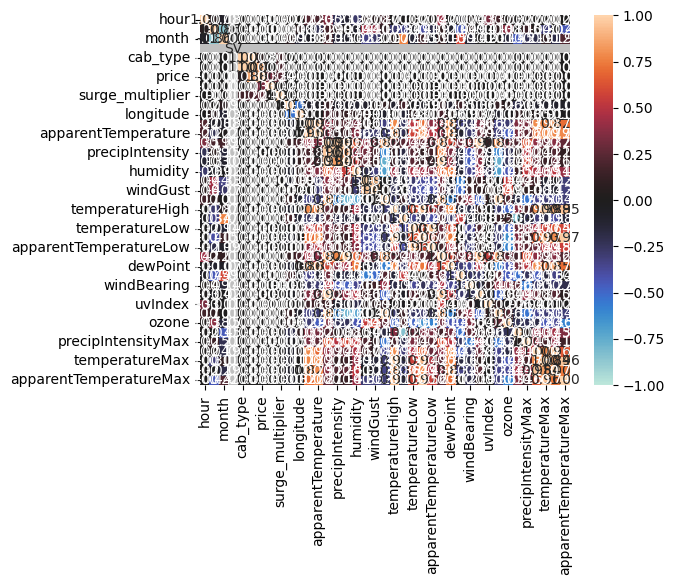

In [ ]:
corr = associations(df)

Because we want to know which features that affect the *price* the most and reduce the computational cost as well, we'll sort the correlation coefficients in descending order and take only the top 5. The $+$ and $-$ signs only indicate the direction of the linear relationship between two variables, thus we can sort by the absolute values of the correlation coefficients to make sorting easier.

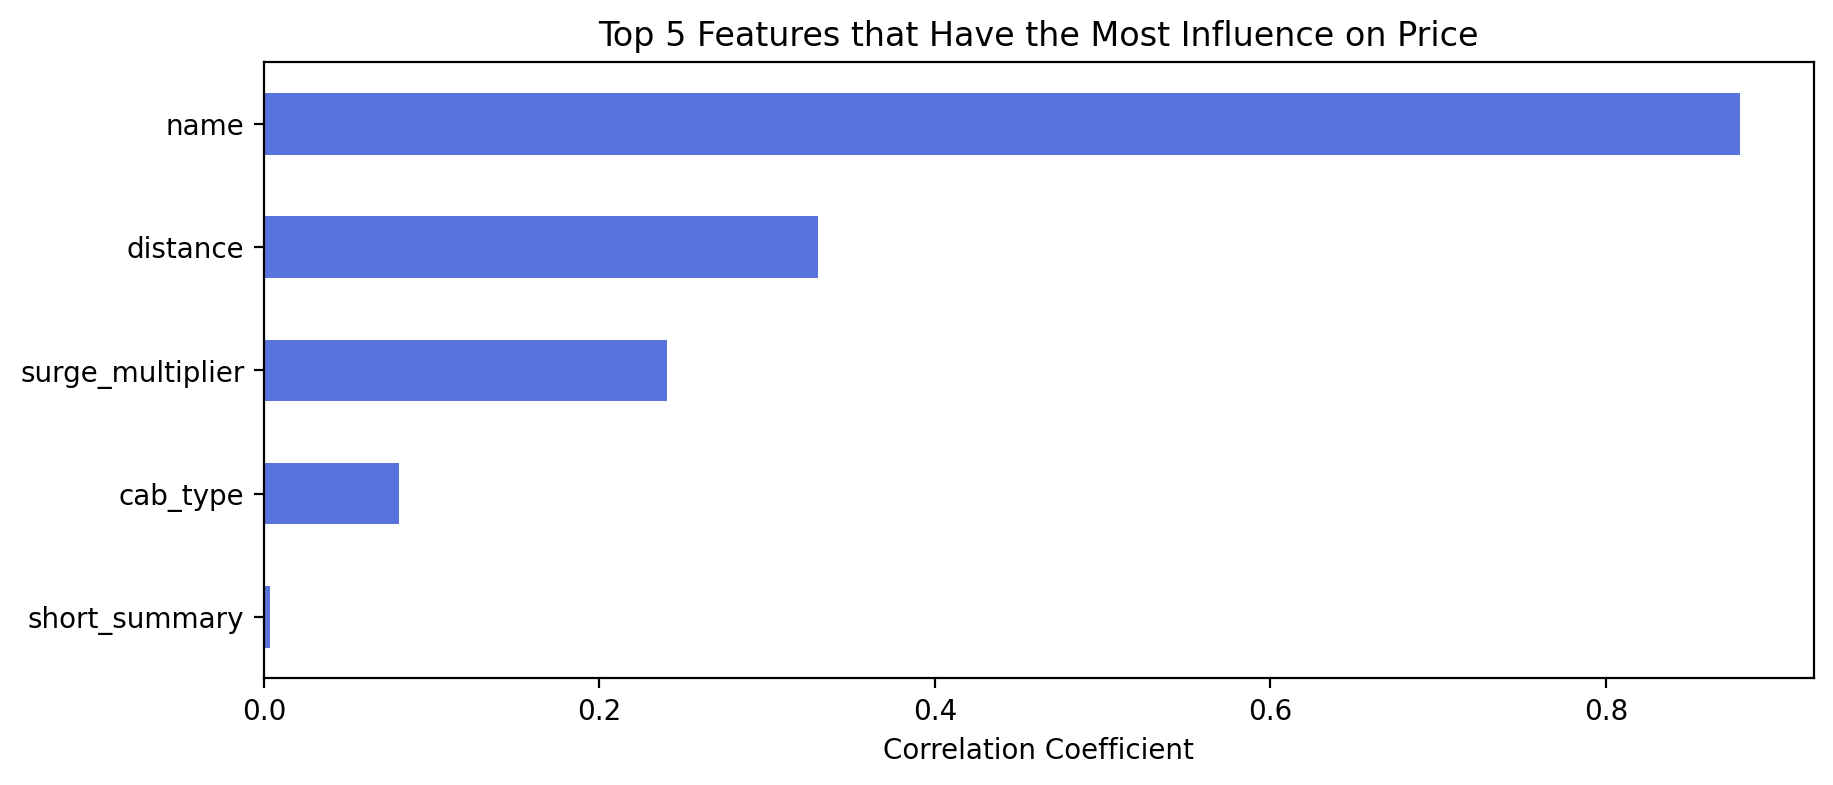

In [ ]:
top_5_corr = abs(corr["corr"][["price"]].drop("price")).sort_values("price",ascending=False).head(5)

fig = plt.figure(figsize=(10,4),dpi=200)
top_5_corr.sort_values("price").plot(
    kind="barh",
    legend=None,
    color="#5874DC",
    ax=plt.gca()
)
plt.title("Top 5 Features that Have the Most Influence on Price")
plt.xlabel("Correlation Coefficient")
plt.show()

It can be seen that the features that have a lot of influence are in order 1 to 4, so delete the features in order 5 and the features that are not included in the top 5.

In [ ]:
df = df[['name','distance','surge_multiplier','cab_type','price']]
df.head()

,name,distance,surge_multiplier,cab_type,price
0,Shared,0.44,1.0,Lyft,5.0
1,Lux,0.44,1.0,Lyft,11.0
2,Lyft,0.44,1.0,Lyft,7.0
3,Lux Black XL,0.44,1.0,Lyft,26.0
4,Lyft XL,0.44,1.0,Lyft,9.0


Remove Outliers

In [ ]:
price_Q1 = df['price'].quantile(0.25)
price_Q3 = df['price'].quantile(0.75)
price_IQR = price_Q3-price_Q1

price_lower_limit = price_Q1 - (1.5 * price_IQR)
price_upper_limit = price_Q3 + (1.5 * price_IQR)

In [ ]:
print('Size before removing :',df.shape)

df = df[(df["price"] >= price_lower_limit) & (df["price"] <= price_upper_limit)]

print('Size after removing :',df.shape)

Size before removing : (693071, 5)
Size after removing : (685089, 5)


# **Data Exploration**

Analyze and visualize the distribution of ride costs on Uber and Lyft.

<ipython-input-20-7b5ecfd1ee1e>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  uber_name = df[df["cab_type"] == "Uber"].groupby("name").sum()[["price"]].sort_values("price",ascending=False)
<ipython-input-20-7b5ecfd1ee1e>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  lyft_name = df[df["cab_type"] == "Lyft"].groupby("name").sum()[["price"]].sort_values("price",ascending=False)


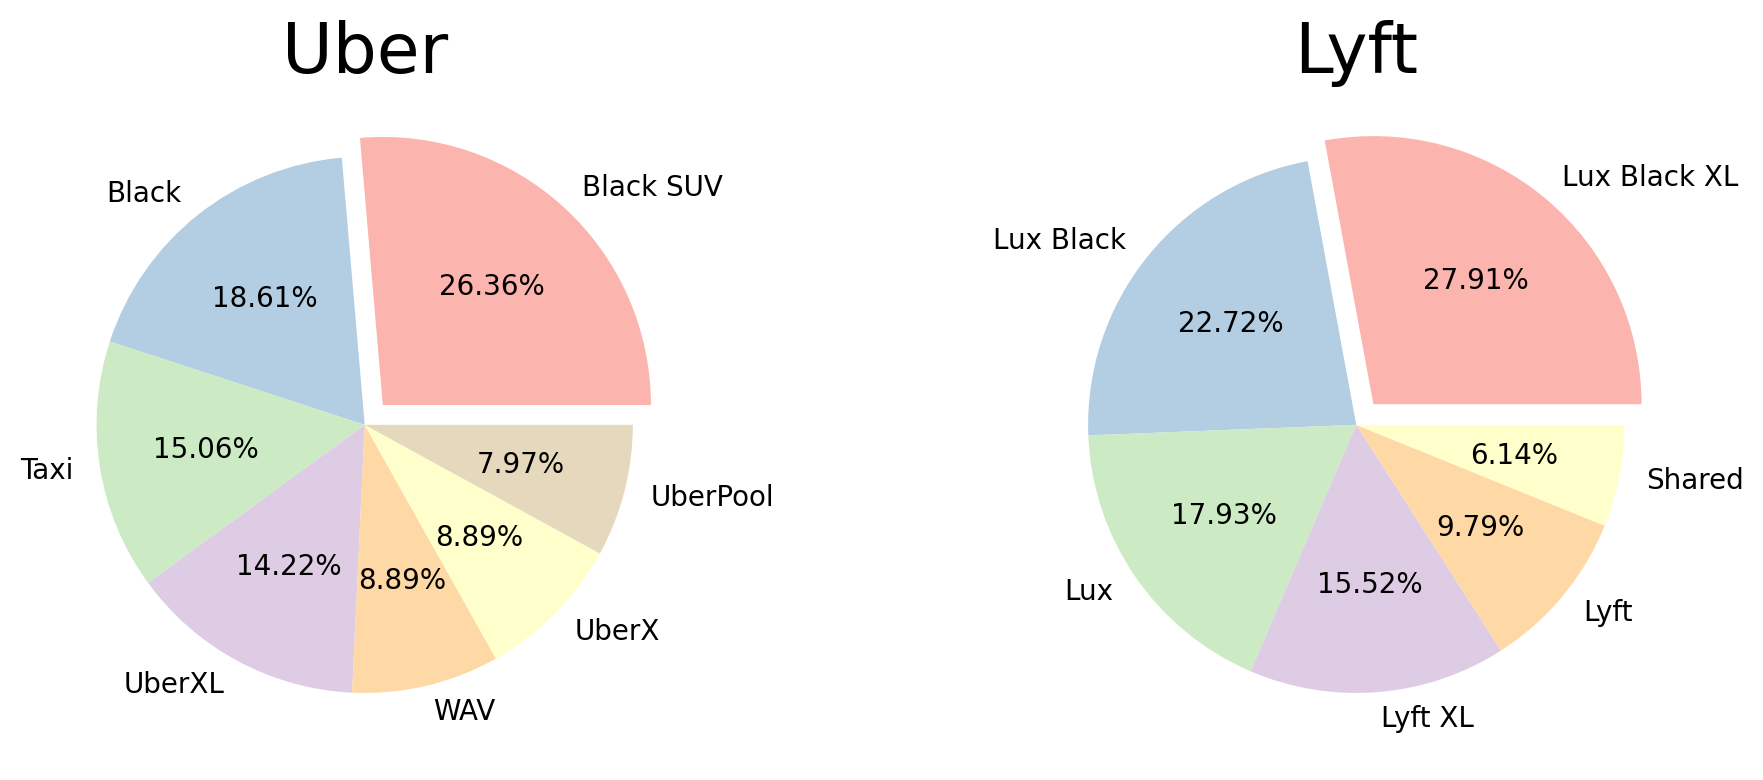

In [ ]:
uber_name = df[df["cab_type"] == "Uber"].groupby("name").sum()[["price"]].sort_values("price",ascending=False)
lyft_name = df[df["cab_type"] == "Lyft"].groupby("name").sum()[["price"]].sort_values("price",ascending=False)

fig,ax = plt.subplots(figsize=(10,4),dpi=200,nrows=1,ncols=2)

ax[0].pie(uber_name["price"],labels=uber_name.index,autopct="%.2f%%",explode=[0.1,0,0,0,0,0,0],colors=sns.color_palette("Pastel1"))
ax[0].set_title("Uber",size=25)

ax[1].pie(lyft_name["price"],labels=lyft_name.index,autopct="%.2f%%",explode=[0.1,0,0,0,0,0],colors=sns.color_palette("Pastel1"))
ax[1].set_title("Lyft",size=25)

plt.tight_layout()
plt.show()

# **Data Pre-processing**

Uses one hot encoding because it is compatible with linear models and can prevent the model from assuming an ordinal relationship between categories.

In [ ]:
df_encode = pd.get_dummies(df[['name','cab_type']]).astype('int')
df_not_encode = df.drop(['name','cab_type'],axis=1)

In [ ]:
df = pd.concat([df_not_encode,df_encode], axis=1)
df.head()

,distance,surge_multiplier,price,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_Taxi,name_UberPool,name_UberX,name_UberXL,name_WAV,cab_type_Lyft,cab_type_Uber
0,0.44,1.0,5.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,0.44,1.0,11.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,0.44,1.0,7.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3,0.44,1.0,26.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,0.44,1.0,9.0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


Define features (X) and target (y) variables.

In [ ]:
X = df.drop("price",axis=1)
y = df["price"]

Divide the dataset into two parts, training data and testing data with a ratio of 80:20.

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1221)

print(f"Training dataset\t: {len(X_train)}")
print(f"Testing dataset\t\t: {len(X_test)}")

Training dataset	: 548071
Testing dataset		: 137018


Perform feature scaling on training data and testing data.

In [ ]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# **Model Definition**

Prepare a model that will be used to study the linear relationship between features and 'price'.

In [ ]:
lr_model = LinearRegression()

# **Testing Model**

Train a model using training data.

In [ ]:
lr_model.fit(scaled_X_train,y_train)

LinearRegression()

Uses a pre-trained linear regression model to make predictions on data testing.

In [ ]:
lr_pred = lr_model.predict(scaled_X_test)

# **Evaluating Model**

Evaluate the models using metrics as follows:

1. Mean Absolute Error (MAE)

   In statistics, mean absolute error (MAE) is a measure of errors between paired observations expressing the same phenomenon. Examples of y versus X include comparisons of predicted versus observed, subsequent time versus initial time, and one technique of measurement versus an alternative technique of measurement. MAE is calculated as the sum of absolute errors divided by the sample size.

  $ MAE = \frac{1}{n}\sum\limits_{i=1}^n |y_{i} - \hat{y}_{i}| $

2. Mean Squared Error (MSE)

   The MSE either assesses the quality of a predictor (i.e., a function mapping arbitrary inputs to a sample of values of some random variable), or of an estimator (i.e., a mathematical function mapping a sample of data to an estimate of a parameter of the population from which the data is sampled). In the context of prediction, understanding the prediction interval can also be useful as it provides a range within which a future observation will fall, with a certain probability..The definition of an MSE differs according to whether one is describing a predictor or an estimator.
  
  $ MSE = \frac{1}{n}\sum\limits_{i=1}^n (y_{i} - \hat{y}_{i})^2 $
  
  $ RMSE = \sqrt{\frac{1}{n}\sum\limits_{i=1}^n (y_{i} - \hat{y}_{i})^2} $

3. Coefficient of Determination ($R^2$)

   In statistics, the coefficient of determination, denoted $R^2$ and pronounced "R squared", is the proportion of the variation in the dependent variable that is predictable from the independent variable(s).

  $ R^2 = 1 - \frac{\sum(y_{i} - \hat{y}_{i})^2}{\sum(y_{i} - \bar{y}_{i})^2} $

**Source:**

*en.wikipedia.org*

Measuring how well a model can make predictions on data.

In [ ]:
mae = mean_absolute_error(y_test,lr_pred)
mse = mean_squared_error(y_test,lr_pred)
rmse = np.sqrt(mean_squared_error(y_test,lr_pred))
rsq = r2_score(y_test,lr_pred)

To compare performance evaluation metrics of linear regression models to evaluate the extent to which the model can accurately predict target values ('price').

In [ ]:
lr_eval={'R-Squared': rsq,
        'Mean Absolute Error': mae,
        'Mean Squared Error': mse,
        'Root Mean Squared Error': rmse}
lr_eval = pd.DataFrame(lr_eval, index=[''])
lr_eval

,R-Squared,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error
,0.922789,1.703101,5.304248,2.303095


Compare the actual and predicted values of a linear regression model that has been obtained.

In [ ]:
actual_vs_predict = pd.DataFrame({'Actual': y_test,'Linear Regression Prediction': lr_pred}).reset_index(drop=True)
actual_vs_predict

,Actual,Linear Regression Prediction
0,13.5,14.120098
1,13.5,13.735332
2,16.5,17.334941
3,22.5,24.260723
4,13.5,14.975566
...,...,...
137013,34.0,28.586894
137014,7.5,8.637676
137015,11.0,9.757793
137016,10.5,10.568340


To visualize the comparison between the actual and prediction values of a linear regression model, we can use a density plot.

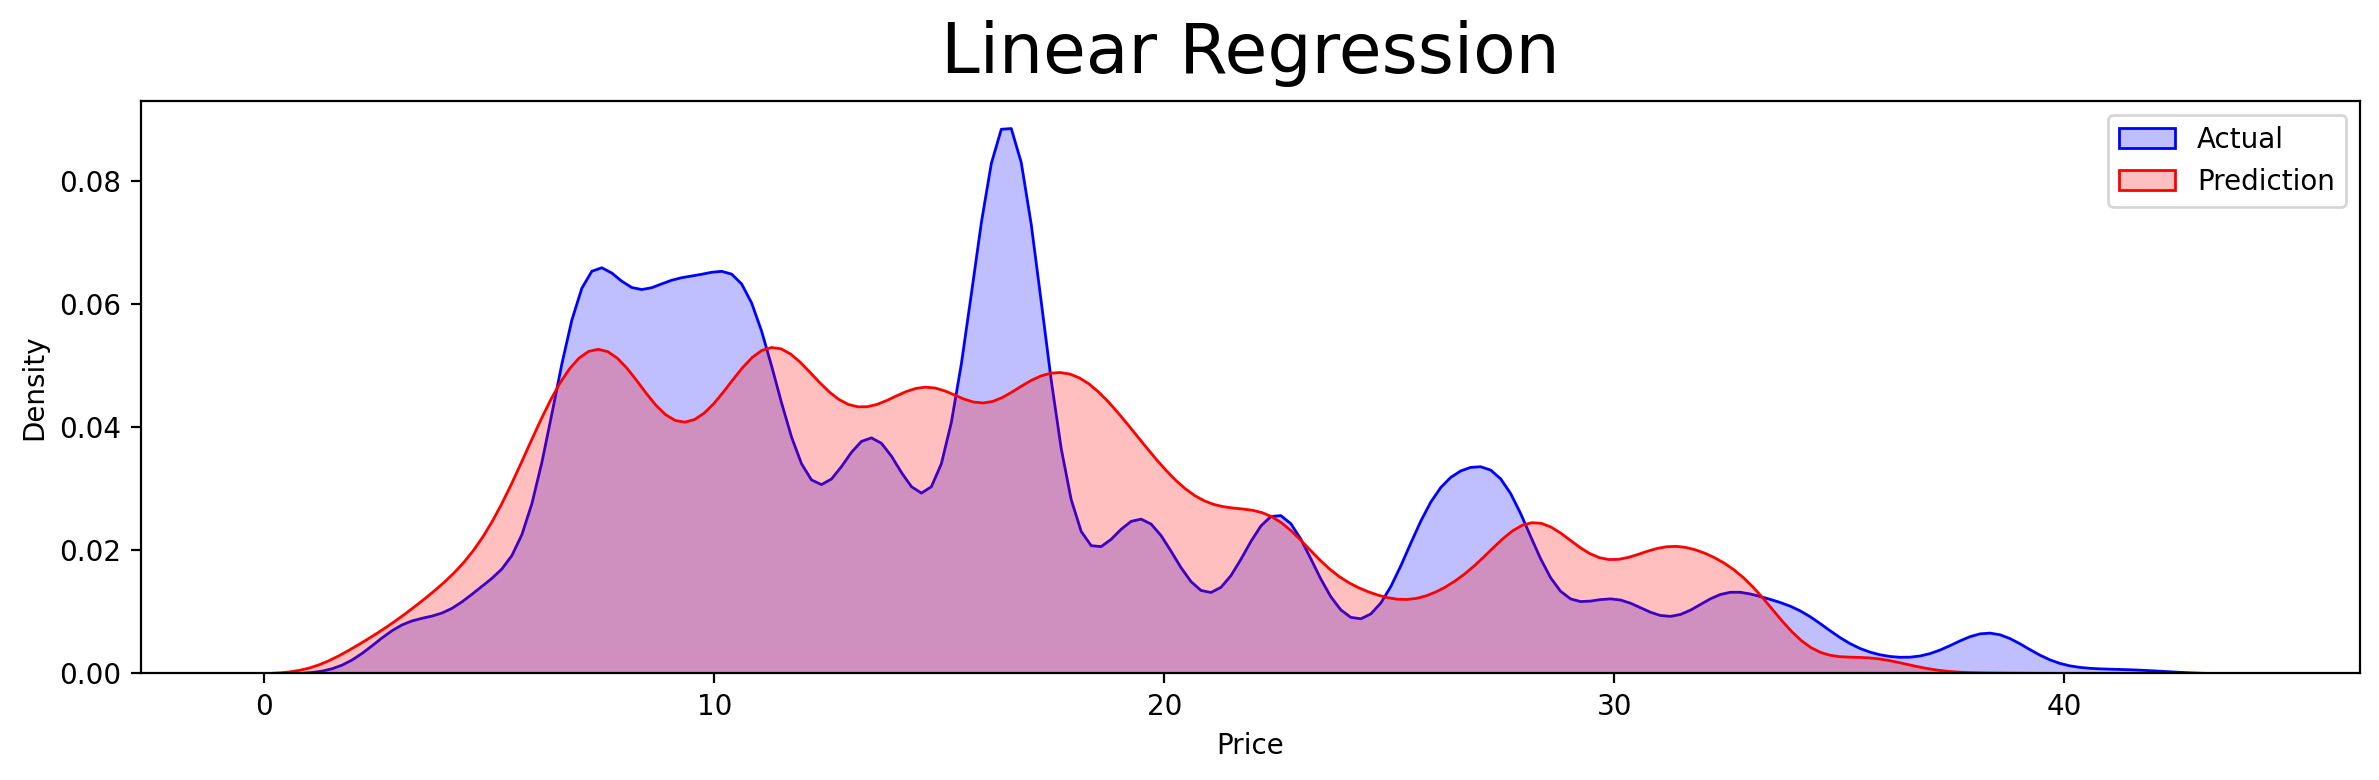

In [ ]:
plt.figure(figsize=(12,4),dpi=200)
sns.kdeplot(y_test,color="blue",fill=True,label="Actual")
sns.kdeplot(lr_pred,color="red",fill=True,label="Prediction")
plt.title("Linear Regression",size=25,pad=10)
plt.xlabel("Price")
plt.legend(loc="upper right")

plt.tight_layout()
plt.show()

Save any final models for future use such as to make data's prediction that has never been seen before.

In [ ]:
final_lr_model = LinearRegression().fit(X,y)

dump(final_lr_model,"linear_regression.joblib")
print("linear_regression.joblib has been saved successfully!")

linear_regression.joblib has been saved successfully!


# **Conclusion**

The problem has been successfully modeled using linear regression. It was found that the five most significant factors influencing the price are 'name,' 'distance,' 'surge_multiplier,' and 'cab_type,'. After training and evaluation, the obtained R-Squared value (indicating the proportion of the variance in the dependent variable 'price' that is predictable from the independent variables) is 0.923353, and the mean squared error (a measure of the average squared differences between actual data and predicted data) is 5.304193. According to the literature, a higher R-Squared value and a smaller error indicate better predictive performance of the model. This demonstrates that the model we built provides reasonably accurate predictions, as reflected in both the R-Squared value and the actual_vs_predict table in the source code, where the difference between the average actual data and prediction data is approximately around 0-1.